In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('ai_job_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  object 
 6   company_location        15000 non-null  object 
 7   company_size            15000 non-null  object 
 8   employee_residence      15000 non-null  object 
 9   remote_ratio            15000 non-null  int64  
 10  required_skills         15000 non-null  object 
 11  education_required      15000 non-null  object 
 12  years_experience        15000 non-null  int64  
 13  industry                15000 non-null  object 
 14  posting_date            15000 non-null

In [3]:
df.shape

(15000, 19)

In [4]:
df.dtypes

job_id                     object
job_title                  object
salary_usd                  int64
salary_currency            object
experience_level           object
employment_type            object
company_location           object
company_size               object
employee_residence         object
remote_ratio                int64
required_skills            object
education_required         object
years_experience            int64
industry                   object
posting_date               object
application_deadline       object
job_description_length      int64
benefits_score            float64
company_name               object
dtype: object

In [5]:
df.info

<bound method DataFrame.info of         job_id                    job_title  salary_usd salary_currency  \
0      AI00001        AI Research Scientist       90376             USD   
1      AI00002         AI Software Engineer       61895             USD   
2      AI00003                AI Specialist      152626             USD   
3      AI00004                 NLP Engineer       80215             USD   
4      AI00005                AI Consultant       54624             EUR   
...        ...                          ...         ...             ...   
14995  AI14996            Robotics Engineer       38604             USD   
14996  AI14997  Machine Learning Researcher       57811             GBP   
14997  AI14998                 NLP Engineer      189490             USD   
14998  AI14999                   Head of AI       79461             EUR   
14999  AI15000     Computer Vision Engineer       56481             USD   

      experience_level employment_type company_location company_siz

In [6]:
df.isnull().sum()

job_id                    0
job_title                 0
salary_usd                0
salary_currency           0
experience_level          0
employment_type           0
company_location          0
company_size              0
employee_residence        0
remote_ratio              0
required_skills           0
education_required        0
years_experience          0
industry                  0
posting_date              0
application_deadline      0
job_description_length    0
benefits_score            0
company_name              0
dtype: int64

In [7]:
print("❓ MISSING VALUES ANALYSIS:")
print("="*50)

missing = df.isnull().sum()
missing_pct = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing.index,
    'Missing_Count': missing.values,
    'Missing_Percentage': missing_pct.values
})

missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
print(missing_df.to_string(index=False))


❓ MISSING VALUES ANALYSIS:
Empty DataFrame
Columns: [Column, Missing_Count, Missing_Percentage]
Index: []


In [8]:
# Numerical summary
print("📈 NUMERICAL COLUMNS SUMMARY:")
df.describe()


📈 NUMERICAL COLUMNS SUMMARY:


,salary_usd,remote_ratio,years_experience,job_description_length,benefits_score
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,115348.965133,49.483333,6.253200,1503.314733,7.504273
std,60260.940438,40.812712,5.545768,576.127083,1.450870
min,32519.000000,0.000000,0.000000,500.000000,5.000000
25%,70179.750000,0.000000,2.000000,1003.750000,6.200000
50%,99705.000000,50.000000,5.000000,1512.000000,7.500000
75%,146408.500000,100.000000,10.000000,2000.000000,8.800000
max,399095.000000,100.000000,19.000000,2499.000000,10.000000


In [9]:
# Initial exploration
print("Dataset overview:")
print(f"Rows: {len(df)}, Columns: {len(df.columns)}")

# Check unique values in key columns
print(f"\nUnique job titles: {df['job_title'].nunique()}")
print(f"Locations: {df['company_location'].nunique()}")

# What experience levels do we have?
df['experience_level'].value_counts()


Dataset overview:
Rows: 15000, Columns: 19

Unique job titles: 20
Locations: 20


experience_level
MI    3781
EX    3760
SE    3741
EN    3718
Name: count, dtype: int64

In [10]:
# Remote work analysis - interesting to see the split
df['remote_ratio'].value_counts()


remote_ratio
0      5075
50     5005
100    4920
Name: count, dtype: int64

In [11]:
# Employment type distribution
df.groupby('employment_type').size().sort_values(ascending=False)


employment_type
FT    3812
FL    3758
CT    3721
PT    3709
dtype: int64

In [12]:
# Check for duplicates and drop them
duplicates = df.duplicated().sum()
print(f"Duplicates found: {duplicates}")

if duplicates > 0:
    df = df.drop_duplicates()
    print("Duplicates removed.")

# Double check shape after deduplication
print(f"Current shape: {df.shape}")


Duplicates found: 0
Current shape: (15000, 19)


In [13]:
# Map experience levels to full names
# EN = Entry, MI = Mid, SE = Senior, EX = Executive
exp_map = {
    'EN': 'Entry Level',
    'MI': 'Mid Level',
    'SE': 'Senior',
    'EX': 'Executive'
}
df['experience_level_full'] = df['experience_level'].map(exp_map)

# Map remote ratio to categories
# 0 = Onsite, 50 = Hybrid, 100 = Remote
remote_map = {
    0: 'Onsite',
    50: 'Hybrid',
    100: 'Remote'
}
df['work_model'] = df['remote_ratio'].map(remote_map)

# Check if it worked
df[['experience_level', 'experience_level_full', 'remote_ratio', 'work_model']].head()



,experience_level,experience_level_full,remote_ratio,work_model
0,SE,Senior,50,Hybrid
1,EN,Entry Level,100,Remote
2,MI,Mid Level,0,Onsite
3,SE,Senior,50,Hybrid
4,EN,Entry Level,100,Remote


In [14]:
# Handle any missing skills and ensure string format
df['required_skills'] = df['required_skills'].fillna('Not Specified')

# Quick look at a few examples
print("Sample skills data:")
print(df['required_skills'].head().values)


Sample skills data:
['Tableau, PyTorch, Kubernetes, Linux, NLP'
 'Deep Learning, AWS, Mathematics, Python, Docker'
 'Kubernetes, Deep Learning, Java, Hadoop, NLP'
 'Scala, SQL, Linux, Python' 'MLOps, Java, Tableau, Python']


In [15]:
# Final check before analysis
print("Cleaned Data Summary:")
print("-" * 30)
print(f"Rows: {len(df)}")
print(f"Columns: {df.columns.tolist()}")

# Check for any remaining nulls in key columns
key_cols = ['salary_usd', 'company_location', 'experience_level_full']
print("\nMissing values in key columns:")
print(df[key_cols].isnull().sum())


Cleaned Data Summary:
------------------------------
Rows: 15000
Columns: ['job_id', 'job_title', 'salary_usd', 'salary_currency', 'experience_level', 'employment_type', 'company_location', 'company_size', 'employee_residence', 'remote_ratio', 'required_skills', 'education_required', 'years_experience', 'industry', 'posting_date', 'application_deadline', 'job_description_length', 'benefits_score', 'company_name', 'experience_level_full', 'work_model']

Missing values in key columns:
salary_usd               0
company_location         0
experience_level_full    0
dtype: int64


Exploratory Data Analysis (EDA).

Experience Level Distribution

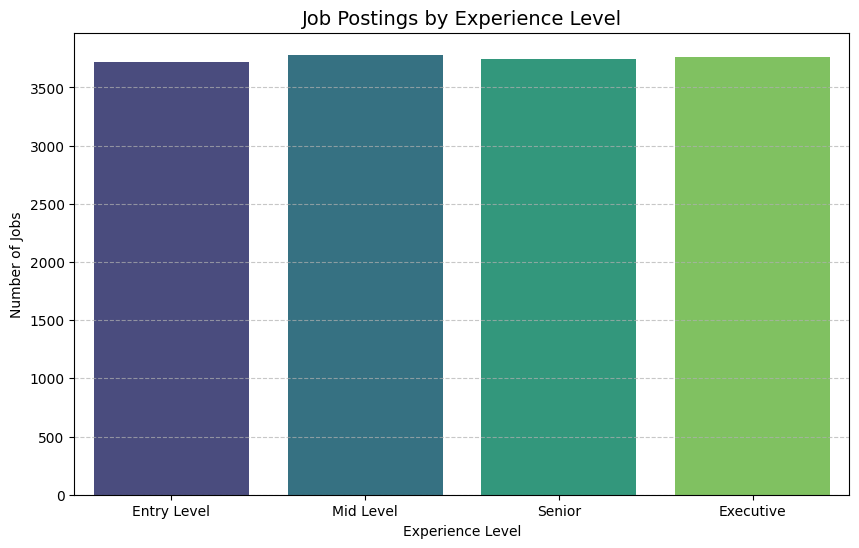

experience_level_full
Entry Level    3718
Mid Level      3781
Senior         3741
Executive      3760
Name: count, dtype: int64


In [ ]:
# Set a custom order so the chart makes logical sense
exp_order = ['Entry Level', 'Mid Level', 'Senior', 'Executive']

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='experience_level_full', order=exp_order, palette='viridis')

plt.title('Job Postings by Experience Level', fontsize=14)
plt.xlabel('Experience Level')
plt.ylabel('Number of Jobs')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

# Quick print of exact numbers
print(df['experience_level_full'].value_counts().loc[exp_order])



Top 10 Hiring Countries

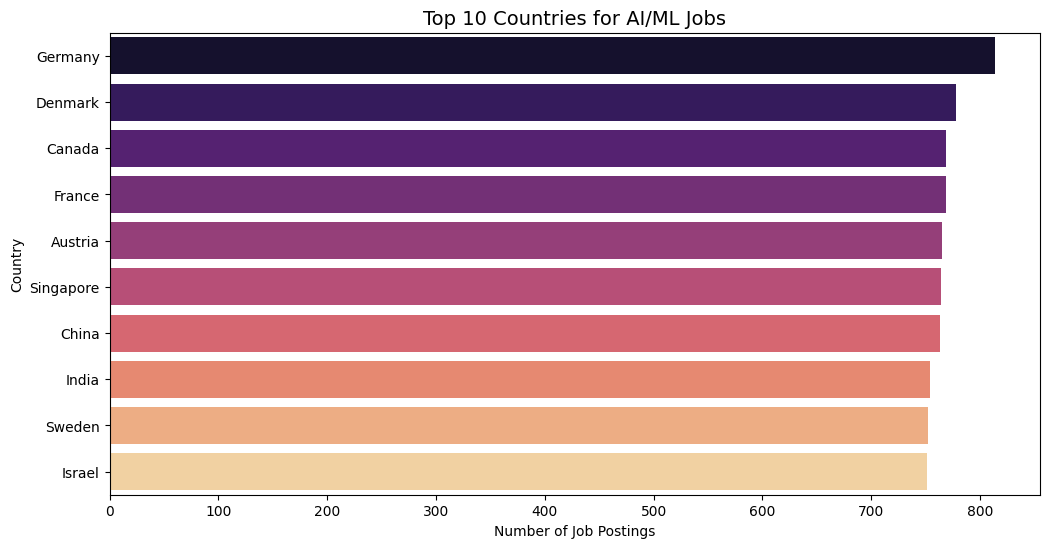

In [ ]:
# Get top 10 locations
top_locations = df['company_location'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_locations.values, y=top_locations.index, palette='magma')

plt.title('Top 10 Countries for AI/ML Jobs', fontsize=14)
plt.xlabel('Number of Job Postings')
plt.ylabel('Country')

plt.show()


Salary Distribution by Experience

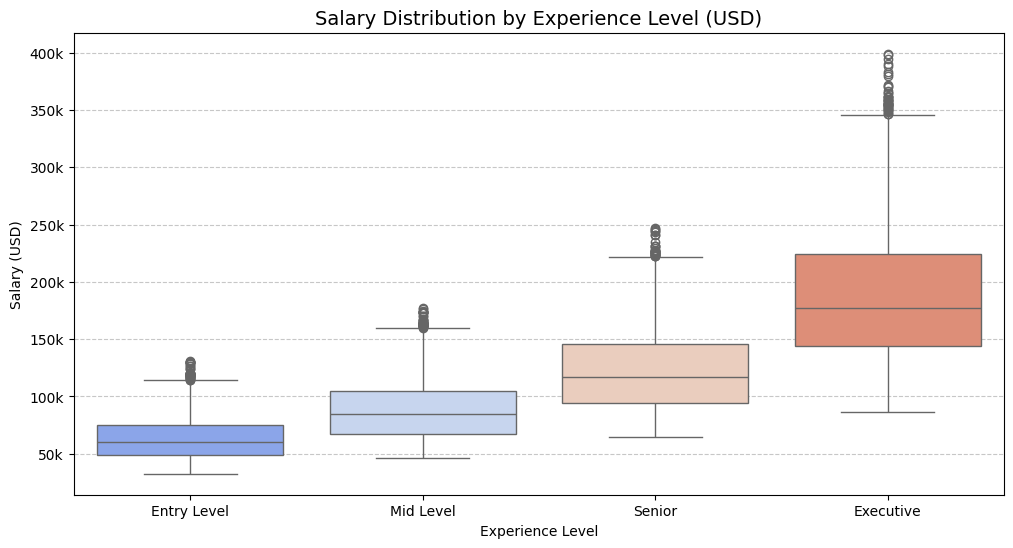

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='experience_level_full', y='salary_usd', order=exp_order, palette='coolwarm')

plt.title('Salary Distribution by Experience Level (USD)', fontsize=14)
plt.xlabel('Experience Level')
plt.ylabel('Salary (USD)')

# Format y-axis to show 'k' (thousands) instead of scientific notation
from matplotlib.ticker import FuncFormatter
def thousands(x, pos):
    return '%1.0fk' % (x * 1e-3)

plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands))
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


 Remote vs. Onsite Trends

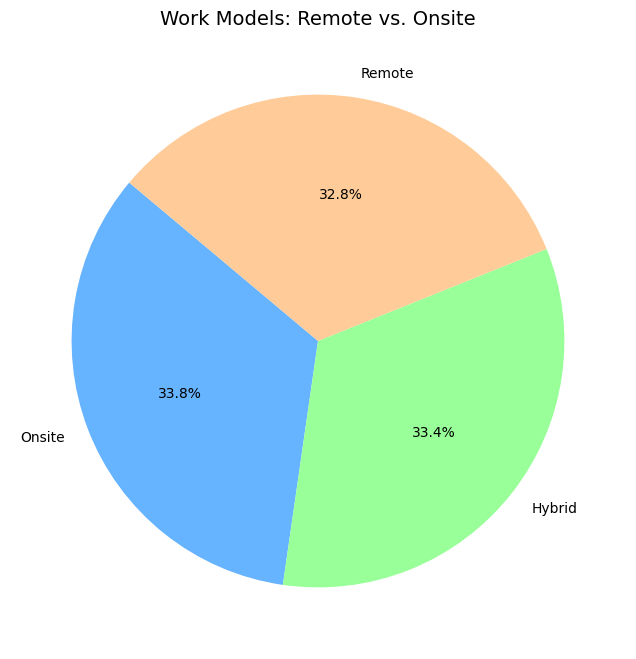

In [ ]:
# Calculate percentages
work_counts = df['work_model'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(work_counts, labels=work_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#99ff99','#ffcc99'])
plt.title('Work Models: Remote vs. Onsite', fontsize=14)

plt.show()


In [20]:
from collections import Counter


In [21]:
# 1. Combine all skill strings into one giant list
all_skills = []

# Iterate through the column, split by comma, and clean whitespace
for skill_string in df['required_skills'].dropna():
    # Example: "Python, SQL" -> ["Python", "SQL"]
    skills = [s.strip() for s in skill_string.split(',')]
    all_skills.extend(skills)

In [22]:
all_skills
skill_counts = Counter(all_skills)


In [23]:
skill_counts

Counter({'Python': 4450,
         'SQL': 3407,
         'TensorFlow': 3022,
         'Kubernetes': 3009,
         'Scala': 2794,
         'PyTorch': 2777,
         'Linux': 2705,
         'Git': 2631,
         'Java': 2578,
         'GCP': 2442,
         'Hadoop': 2419,
         'Tableau': 2341,
         'R': 2311,
         'Computer Vision': 2284,
         'Data Visualization': 2270,
         'Deep Learning': 2189,
         'MLOps': 2164,
         'Spark': 2155,
         'NLP': 2145,
         'Azure': 2144,
         'AWS': 2018,
         'Mathematics': 1943,
         'Docker': 1862,
         'Statistics': 1833})

In [24]:
skill_df = pd.DataFrame(skill_counts.most_common(20), columns=['Skill', 'Count'])

print("✅ Top 20 Skills Found:")
print(skill_df)
print("-" * 40)

✅ Top 20 Skills Found:
                 Skill  Count
0               Python   4450
1                  SQL   3407
2           TensorFlow   3022
3           Kubernetes   3009
4                Scala   2794
5              PyTorch   2777
6                Linux   2705
7                  Git   2631
8                 Java   2578
9                  GCP   2442
10              Hadoop   2419
11             Tableau   2341
12                   R   2311
13     Computer Vision   2284
14  Data Visualization   2270
15       Deep Learning   2189
16               MLOps   2164
17               Spark   2155
18                 NLP   2145
19               Azure   2144
----------------------------------------


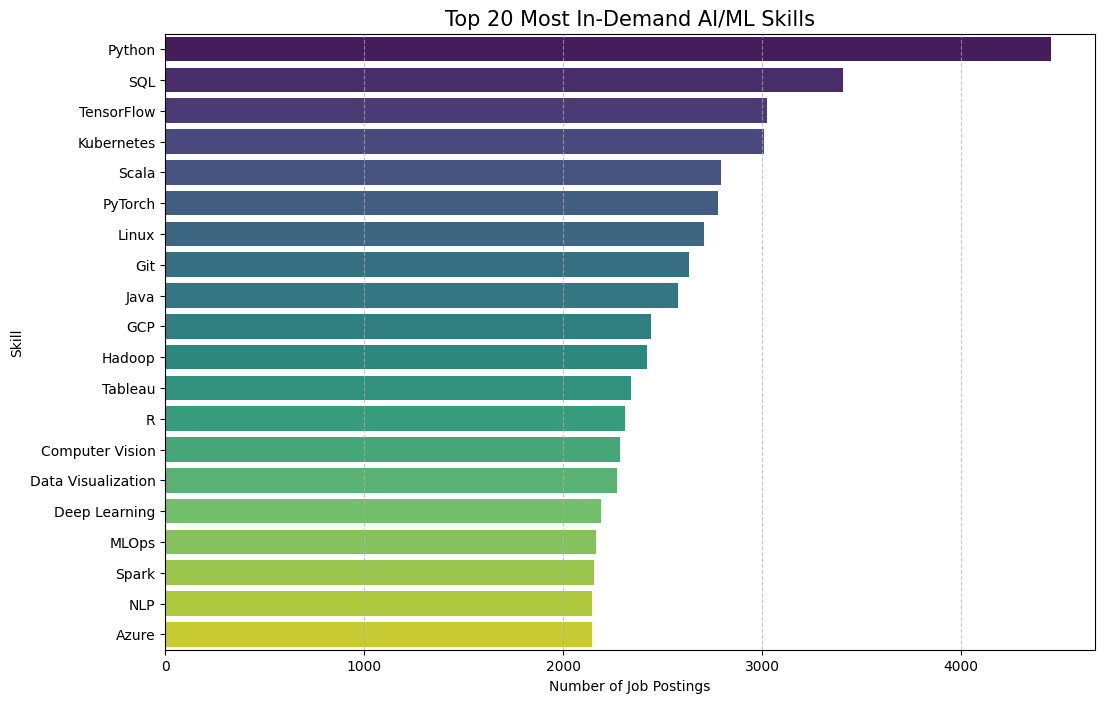

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(data=skill_df, x='Count', y='Skill', palette='viridis')

plt.title('Top 20 Most In-Demand AI/ML Skills', fontsize=15)
plt.xlabel('Number of Job Postings')
plt.ylabel('Skill')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

In [26]:
top_country = df['company_location'].mode()[0]
print(f"🌍 Top Hiring Hub: {top_country}")

# 2. Top Skill
top_skill = skill_df.iloc[0]['Skill']
print(f"🛠️ Most In-Demand Skill: {top_skill} (Learn this first!)")

# 3. Salary Insights
avg_salary = df['salary_usd'].median()
print(f"💰 Median Industry Salary: ${avg_salary:,.0f}")

# 4. Remote Work Trend
remote_pct = (df['work_model'] == 'Remote').mean() * 100
print(f"🏠 Remote Work Opportunity: {remote_pct:.1f}% of jobs are fully remote")

print("\n🚀 FINAL VERDICT:")
print("To land a job in this market: Focus on Python & SQL, look for roles in the US/Global Hubs,")
print("and don't be afraid to negotiate—especially for Senior roles where salary variance is high!")

print("\n✅ PROJECT COMPLETE! Great work, Director Mayank! 😎")

🌍 Top Hiring Hub: Germany
🛠️ Most In-Demand Skill: Python (Learn this first!)
💰 Median Industry Salary: $99,705
🏠 Remote Work Opportunity: 32.8% of jobs are fully remote

🚀 FINAL VERDICT:
To land a job in this market: Focus on Python & SQL, look for roles in the US/Global Hubs,
and don't be afraid to negotiate—especially for Senior roles where salary variance is high!

✅ PROJECT COMPLETE! Great work, Director Mayank! 😎


✅ 'posting_date' converted to datetime objects.
✅ Created 'month_year' column for aggregation.


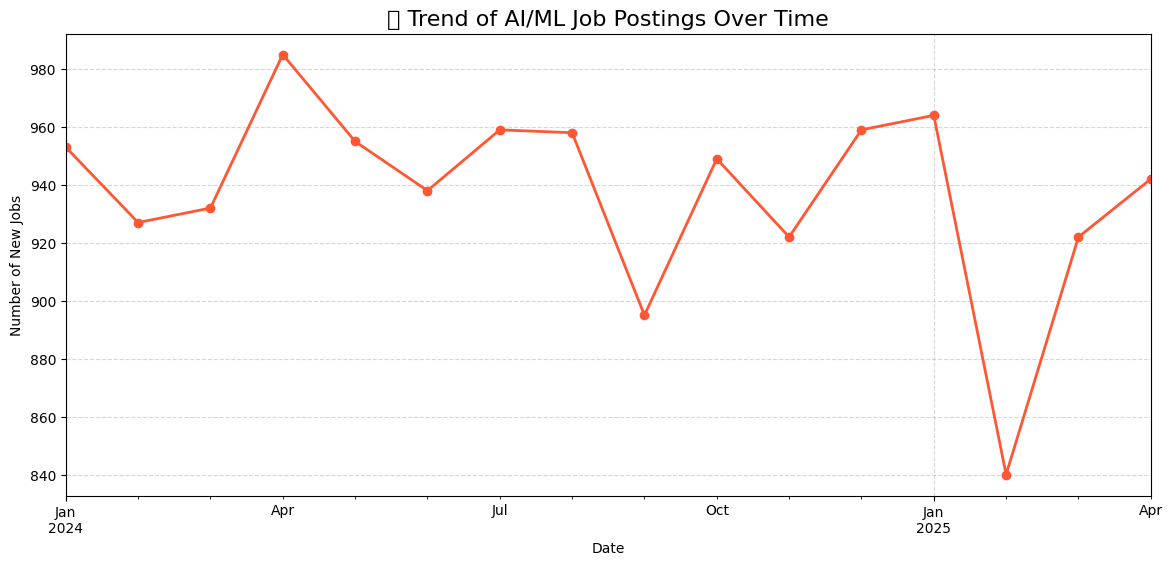

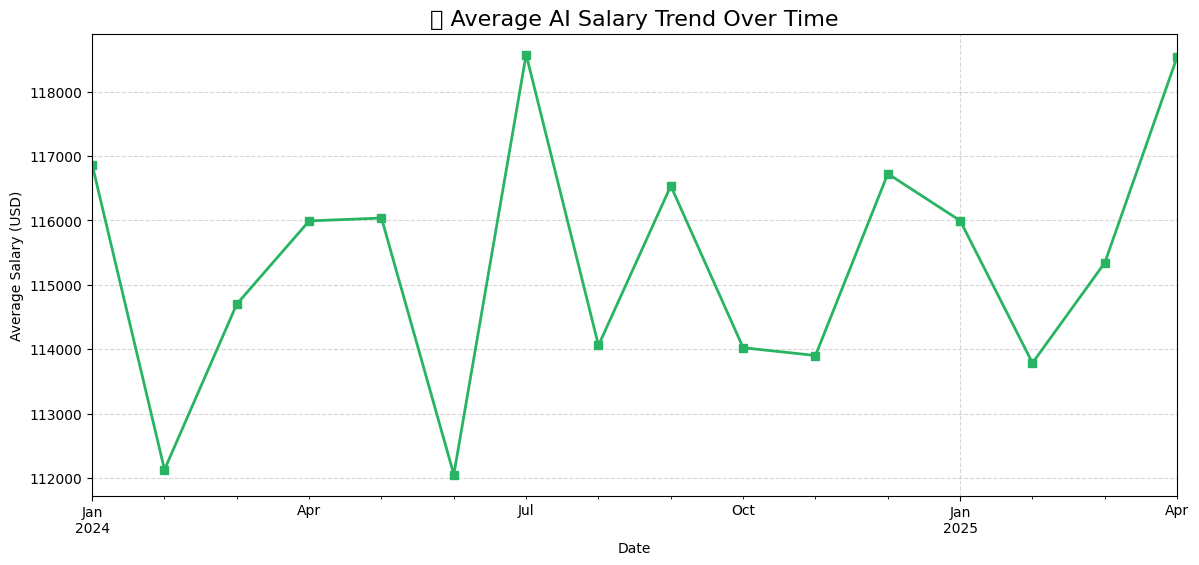

In [ ]:
if 'posting_date' in df.columns:
    df['posting_date'] = pd.to_datetime(df['posting_date'])
    print("✅ 'posting_date' converted to datetime objects.")

    # Extract Month-Year for grouping (e.g., "2024-01")
    df['month_year'] = df['posting_date'].dt.to_period('M')
    print("✅ Created 'month_year' column for aggregation.")
else:
    print("❌ Error: 'posting_date' column not found!")

# 2. Job Volume Trend (Are jobs growing?)
# Count jobs per month
monthly_jobs = df['month_year'].value_counts().sort_index()

# Plotting with a Line Chart
plt.figure(figsize=(14, 6))
monthly_jobs.plot(kind='line', marker='o', color='#FF5733', linewidth=2)

plt.title('📈 Trend of AI/ML Job Postings Over Time', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Number of New Jobs')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# 3. Salary Trend (Are we getting richer?)
# Group by month and get the average salary
salary_trend = df.groupby('month_year')['salary_usd'].mean()

plt.figure(figsize=(14, 6))
salary_trend.plot(kind='line', marker='s', color='#28B463', linewidth=2)

plt.title('💰 Average AI Salary Trend Over Time', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Average Salary (USD)')
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()


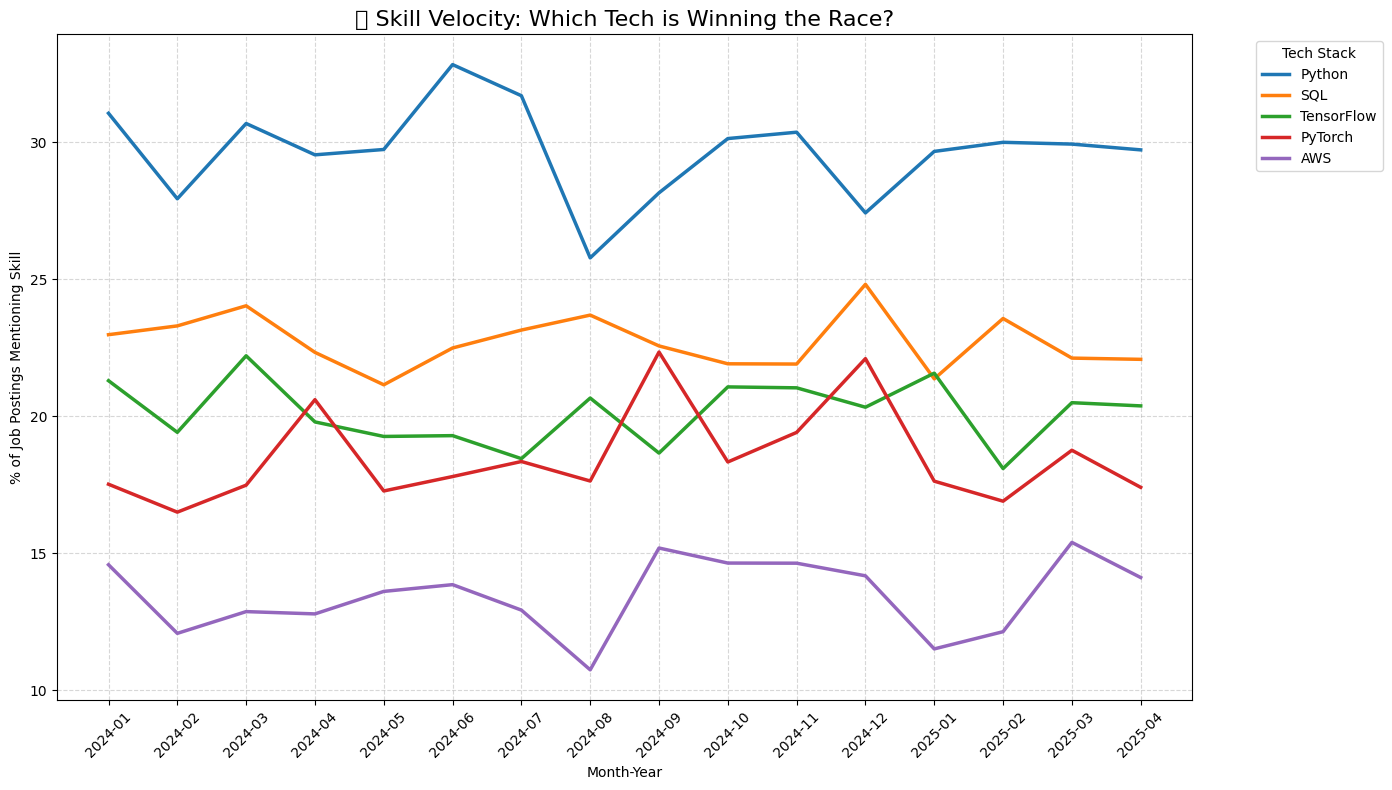

In [ ]:
target_skills = ['Python', 'SQL', 'TensorFlow', 'PyTorch', 'AWS']

# 2. Function to check if a skill is in a row
def check_skill(row_skills, target):
    if isinstance(row_skills, str):
        return target in row_skills
    return False

# 3. Create boolean columns for each skill
for skill in target_skills:
    df[skill] = df['required_skills'].apply(lambda x: check_skill(x, skill))

# 4. Group by Month and Calculate Percentage Presence
skill_trends = df.groupby('month_year')[target_skills].mean() * 100
skill_trends.index = skill_trends.index.astype(str)
# 5. Visualize the Race! 🏁
# Plot again with the fixed index
plt.figure(figsize=(14, 8))
sns.lineplot(data=skill_trends, dashes=False, linewidth=2.5)

plt.title('🔥 Skill Velocity: Which Tech is Winning the Race?', fontsize=16)
plt.xlabel('Month-Year')
plt.ylabel('% of Job Postings Mentioning Skill')
plt.legend(title='Tech Stack', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45) # Rotate labels so they don't overlap
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()